# Working with ARCH Derivatives: networks

In this notebook we'll do some network analyses of the files we got from the COVID19 IIPC collection. It is based on the [original code from Nick Ruest and the Archive Unleashed team](https://github.com/archivesunleashed/notebooks).

We will use domain-graph.csv and nt web-graph.csv (never managed to download fully the second one).

## Environment setup

In [1]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

These derivative files provide network graph data for analysis, and offer an opportunity to explore the way websites link to each other. We'll work with two of the graph data files:

- Domain Graph
- Image Graph
- Web Graph

We will start with the domain graph: smaller file >>> easier to do :). But the code is reproducible for the three network files.

## Domain Graph

In [2]:
# Let's load domain-graph
domain_graph = pd.read_csv("data/domain-graph.csv")
domain_graph

,crawl_date,source,target,count
0,20120119,eff.org,eff.org,2547588
1,20120118,saigonnezumi.com,saigonnezumi.com,469106
2,20120118,jcink.com,jcink.com,386484
3,20120119,jcink.com,jcink.com,261545
4,20120118,ocregister.com,ocregister.com,243026
...,...,...,...,...
30945,20120118,aidajimenez.blogspot.com,netvibes.com,6
30946,20120118,fromdev.com,netvibes.com,6
30947,20120118,joetech.com,izea.in,6
30948,20120118,sonofodin.net,creativecommons.org,6


Let's create a first network with networkx

In [3]:
# If you look closely at the file, you'll see that there are many loops. Probably websites' pages linking to other pages from the same website. Let's remove those selfloops.

domain_graph_noself = domain_graph[domain_graph.source != domain_graph.target]
domain_graph_noself

# That removes a lot of line. 

,crawl_date,source,target,count
33,20120119,eff.org,twitter.com,22955
34,20120119,eff.org,facebook.com,22954
35,20120119,eff.org,identi.ca,22954
36,20120119,eff.org,globalchokepoints.org,22953
37,20120119,eff.org,teachingcopyright.org,22953
...,...,...,...,...
30945,20120118,aidajimenez.blogspot.com,netvibes.com,6
30946,20120118,fromdev.com,netvibes.com,6
30947,20120118,joetech.com,izea.in,6
30948,20120118,sonofodin.net,creativecommons.org,6


In [4]:
# Well, this was already sorted, but in case... let's now select only the first lines
domain_graph_topn = domain_graph_noself.loc[domain_graph_noself['count'] >= 10000]
domain_graph_topn

,crawl_date,source,target,count
33,20120119,eff.org,twitter.com,22955
34,20120119,eff.org,facebook.com,22954
35,20120119,eff.org,identi.ca,22954
36,20120119,eff.org,globalchokepoints.org,22953
37,20120119,eff.org,teachingcopyright.org,22953
41,20120118,google.com,blogger.com,21791
46,20120118,saigonnezumi.com,kevinmillerjr.com,18766
56,20120118,youtube.com,google.com,14756
60,20120118,saigonnezumi.com,amerasianworld.com,13462


In [5]:
# Let's start crete the graph
G = nx.from_pandas_edgelist(
    domain_graph_topn, source="source", target="target", edge_key="target", edge_attr="count"
)
G.remove_edges_from(nx.selfloop_edges(G))

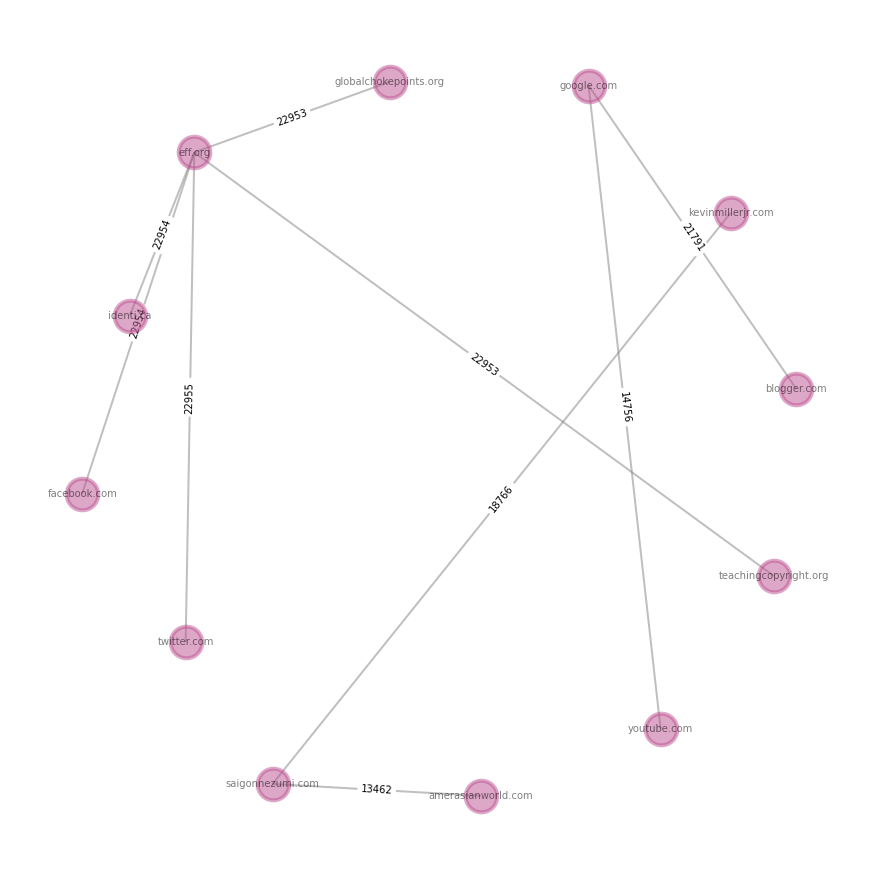

In [6]:
# We are using here the spring layout see:

pos = nx.spring_layout(G, k=15)
options = {
    "node_size": 1000,
    "node_color": "#bc5090",
    "node_shape": "o",
    "alpha": 0.5,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(12, 12))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

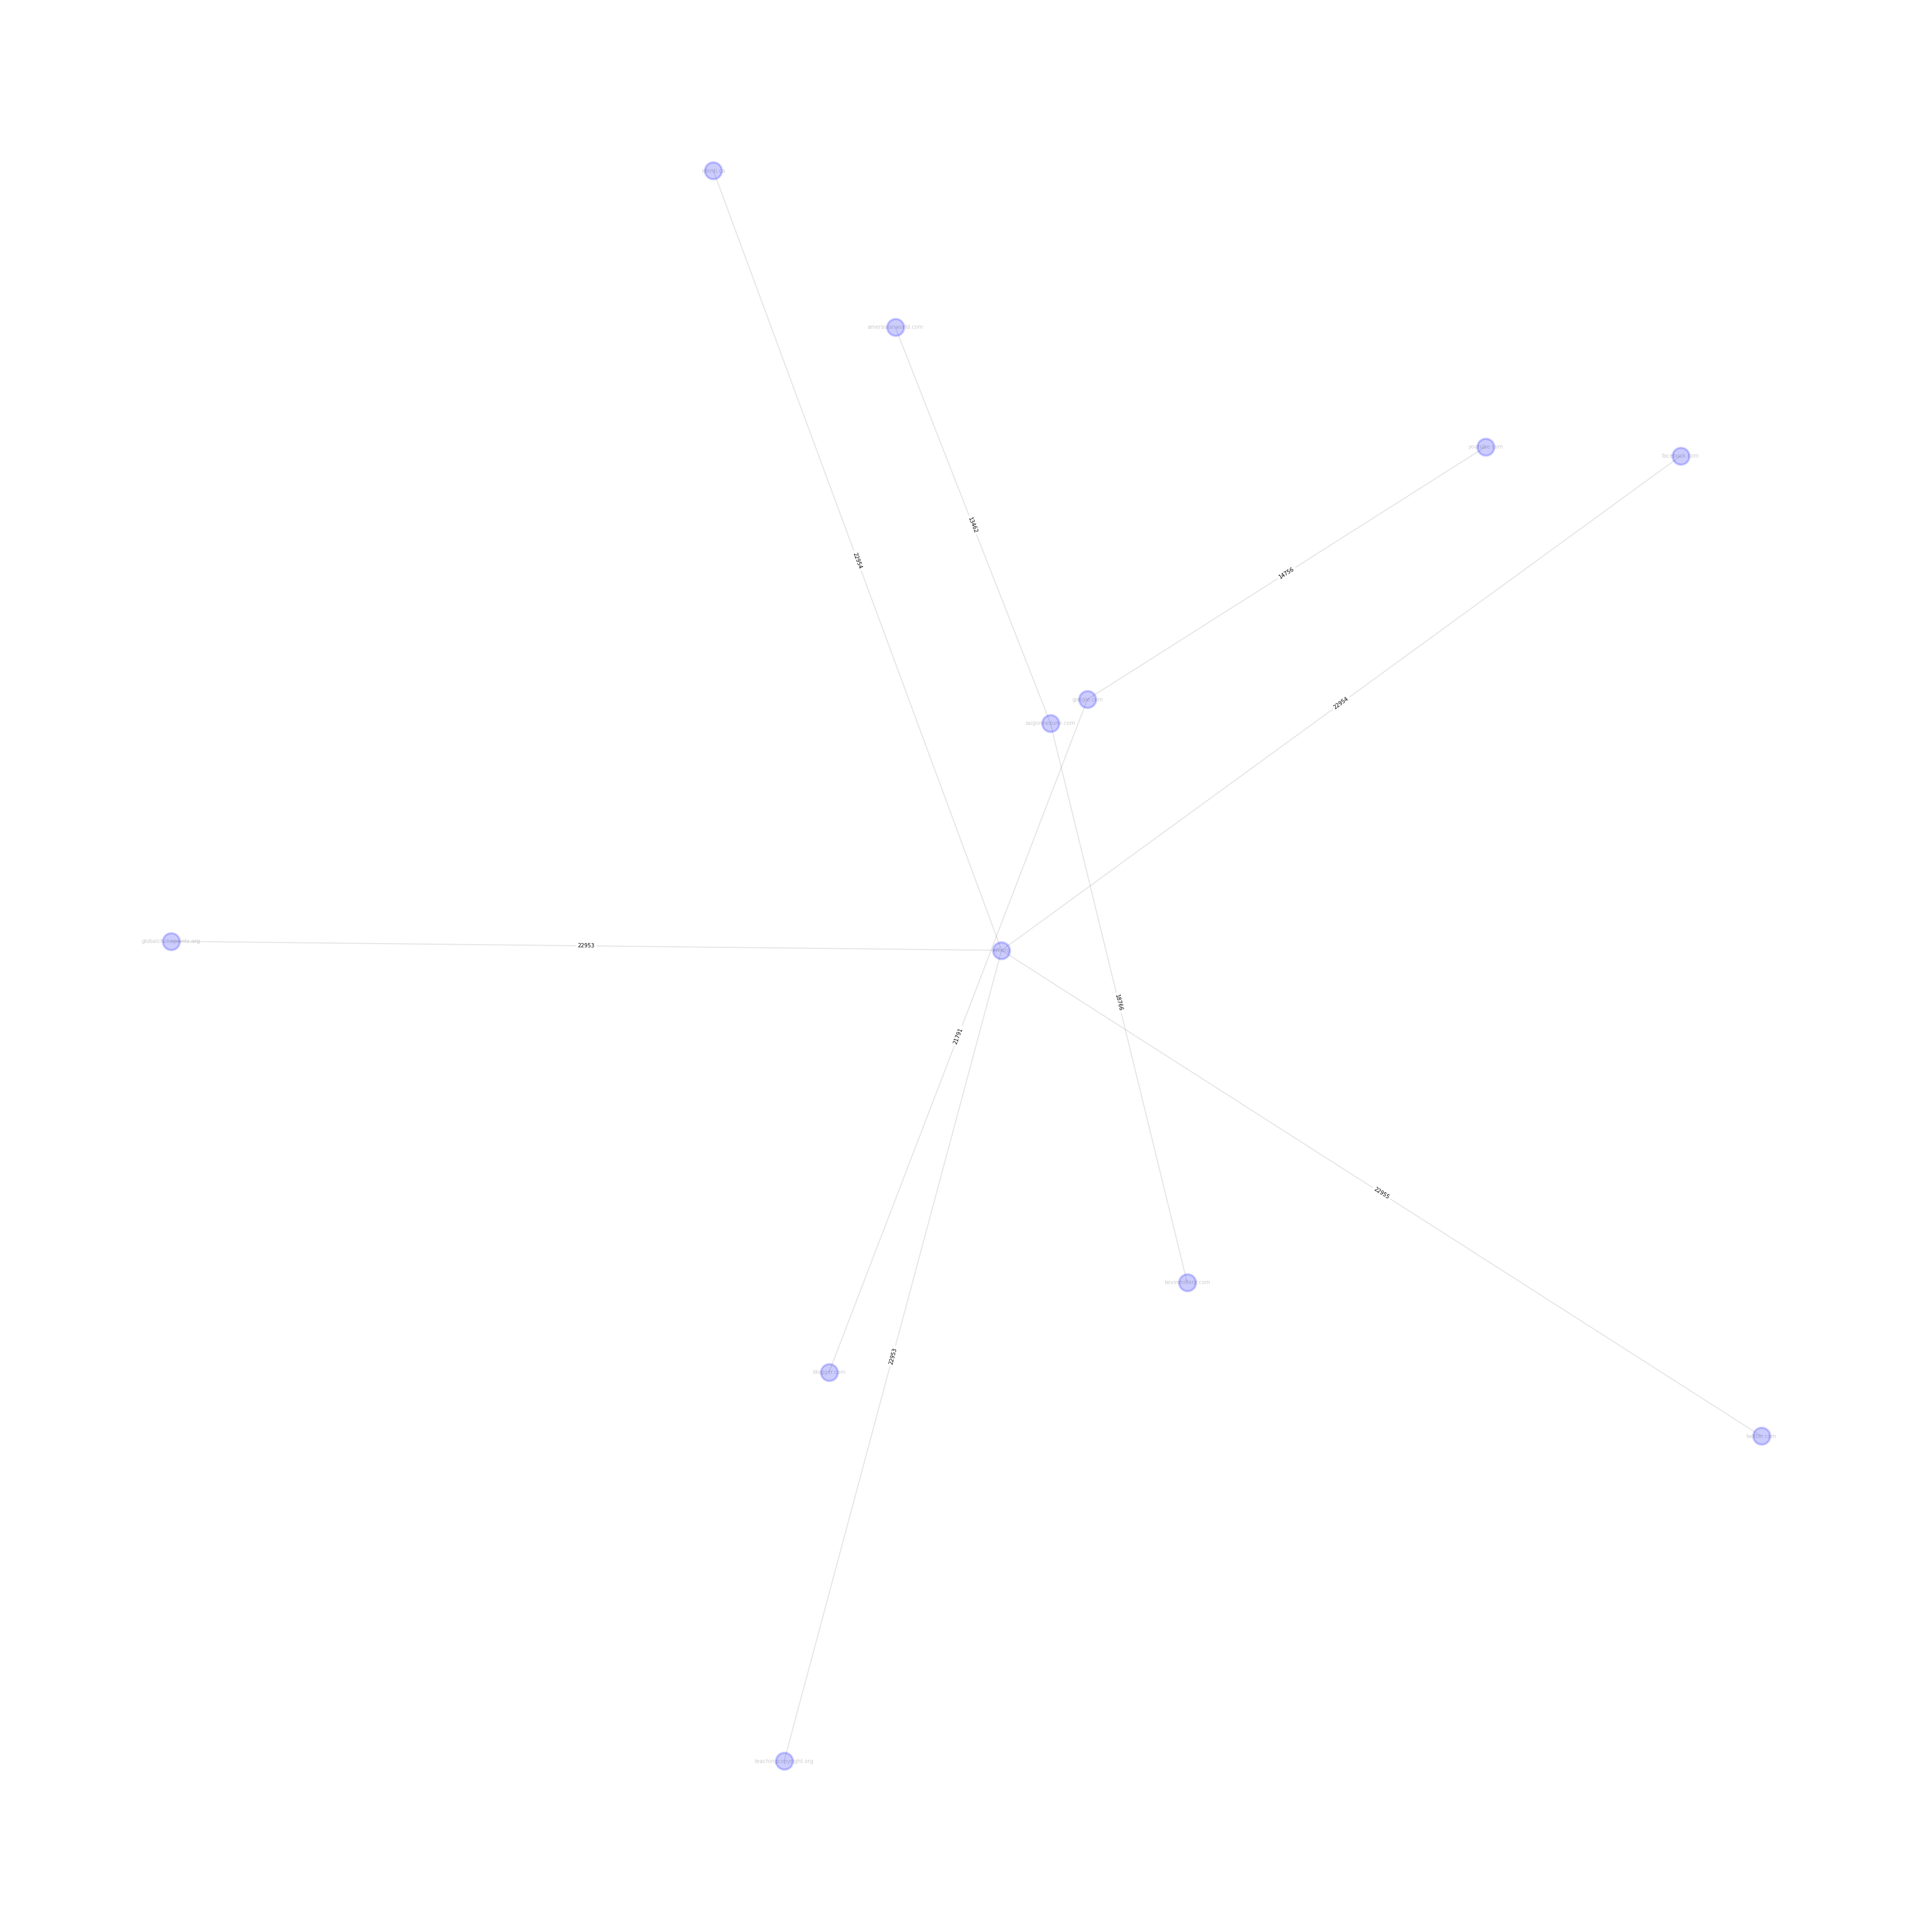

In [7]:
# same but with kamada_kawai_layout

pos = nx.kamada_kawai_layout(G, dist=None, pos=None, weight='count', scale=2, center=None, dim=2)
options = {
    "node_size": 1000,
    "node_color": 'blue',
    "node_shape": "o",
    "alpha": 0.2,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(50, 50))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

## Web Graph

In [8]:
# Let's load web-graph. It might take a long time, but we need to.
# We're loading only the first 1 million lines, for the example. remove nrows or adapt it to your needs
web_graph = pd.read_csv("data/web-graph.csv", nrows=1000000)
web_graph

,crawl_date,source,target,anchor_text
0,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com,NaN
1,20120118,http://feeds.feedburner.com/QuoteSnack,http://wordpress.org/extend/plugins/sopa-black...,NaN
2,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com/takeaction.php,Take Action Now
3,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com/takeaction.php,Join the fight against it!
4,20120118,http://feeds.feedburner.com/QuoteSnack,http://feeds.feedburner.com/feed/,Continue to site.
...,...,...,...,...
999995,20120118,http://mediakit.latimes.com/,https://advertise.latimes.com/portal/page/port...,Jobs
999996,20120118,http://mediakit.latimes.com/,https://advertise.latimes.com/portal/page/port...,Real Estate
999997,20120118,http://mediakit.latimes.com/,https://advertise.latimes.com/,See All Offers
999998,20120118,http://mediakit.latimes.com/,http://www.latimes.com,NaN


A first network

In [9]:
# We start by removeing self-loops. Here, there should be far less self-loops than for the domain graph

web_graph_noself = web_graph[web_graph.source != web_graph.target]
web_graph_noself

,crawl_date,source,target,anchor_text
0,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com,NaN
1,20120118,http://feeds.feedburner.com/QuoteSnack,http://wordpress.org/extend/plugins/sopa-black...,NaN
2,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com/takeaction.php,Take Action Now
3,20120118,http://feeds.feedburner.com/QuoteSnack,http://downagainstsopa.com/takeaction.php,Join the fight against it!
4,20120118,http://feeds.feedburner.com/QuoteSnack,http://feeds.feedburner.com/feed/,Continue to site.
...,...,...,...,...
999995,20120118,http://mediakit.latimes.com/,https://advertise.latimes.com/portal/page/port...,Jobs
999996,20120118,http://mediakit.latimes.com/,https://advertise.latimes.com/portal/page/port...,Real Estate
999997,20120118,http://mediakit.latimes.com/,https://advertise.latimes.com/,See All Offers
999998,20120118,http://mediakit.latimes.com/,http://www.latimes.com,NaN


In [10]:
# Well, this was already sorted, but in case... let's now select only the first lines. Put the number you wish to.
# web_graph_topn = web_graph_noself.loc[web_graph_noself['count'] >= 1000000]
# web_graph_topn

In [11]:
# Let's start crete the graph
G = nx.from_pandas_edgelist(
    web_graph, source="source", target="target", edge_key="target"
)
G.remove_edges_from(nx.selfloop_edges(G))

In [ ]:
# We are using here the spring layout

pos = nx.spring_layout(G, k=15)
options = {
    "node_size": 1000,
    "node_color": "#bc5090",
    "node_shape": "o",
    "alpha": 0.5,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(12, 12))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()

In [ ]:
# same but with kamada_kawai_layout

pos = nx.kamada_kawai_layout(G, dist=None, pos=None, weight='count', scale=2, center=None, dim=2)
options = {
    "node_size": 1000,
    "node_color": 'blue',
    "node_shape": "o",
    "alpha": 0.2,
    "linewidths": 4,
    "font_size": 10,
    "font_color": "black",
    "width": 2,
    "edge_color": "grey",
}

plt.figure(figsize=(50, 50))

nx.draw(G, pos, with_labels=True, **options)

labels = {e: G.edges[e]["count"] for e in G.edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

plt.show()